In [60]:
# Импортируем нужные нам  библиотеки для анализа
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [61]:
# Загружаем датасет
path = '/Users/arturvohmin/Downloads/Student_performance_10k.csv'
df = pd.read_csv(path)

In [62]:
# Отображаем первые пять строк датасета
df.head()

,roll_no,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,science_score,total_score,grade
0,std-01,male,group D,some college,1.0,1.0,89,38.0,85.0,26.0,238.0,C
1,std-02,male,group B,high school,1.0,0.0,65,100.0,67.0,96.0,328.0,A
2,std-03,male,group C,master's degree,1.0,0.0,10,99.0,97.0,58.0,264.0,B
3,std-04,male,group D,some college,1.0,1.0,22,51.0,41.0,84.0,198.0,D
4,std-05,male,group C,some college,0.0,1.0,26,58.0,64.0,65.0,213.0,C


In [63]:
# Создаём нвоый датасет с заполнением пропусков и заменой
data_cleaned = df.copy()
for col in data_cleaned.columns:
    if data_cleaned[col].dtype == 'float64':
        data_cleaned[col].fillna(data_cleaned[col].median(), inplace=True)
    else:
        data_cleaned[col].fillna('Unknown', inplace=True)
        
# Очистка категорий
data_cleaned['gender'] = data_cleaned['gender'].replace({
    '\\tmale': 'male', 'Girl': 'female', 'Boy': 'male'
})
data_cleaned['race_ethnicity'] = data_cleaned['race_ethnicity'].replace({
    'D': 'group D', 'C': 'group C', 'E': 'group E',
    'A': 'group A', 'B': 'group B', 'group C\\n': 'group C'
})

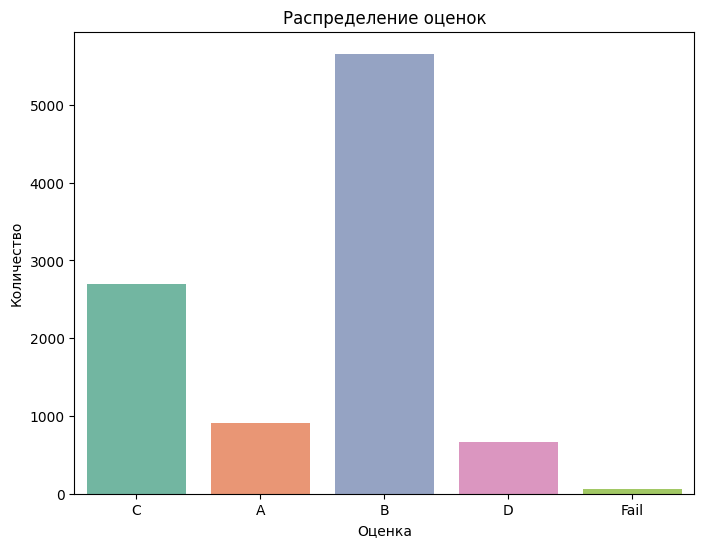

In [64]:
# Строим график распределения оценок
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='grade', palette='Set2')
plt.title("Распределение оценок")
plt.xlabel("Оценка")
plt.ylabel("Количество")
plt.show()

In [65]:
# Создаём вспомогательный датасет для того, чтобы отобрать пол студента
data_cleaned_gender = data_cleaned.query("gender == 'male' or gender == 'female'")

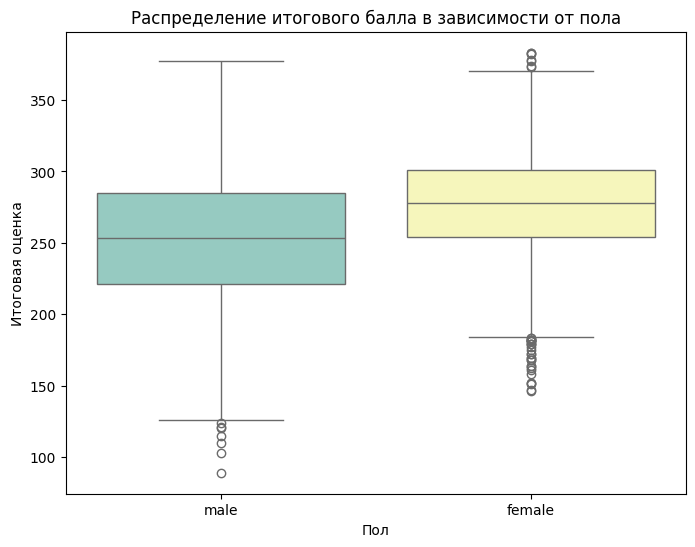

In [66]:
# Строим график распределения итоговой оценки в зависимости от пола

plt.figure(figsize=(8, 6))
sns.boxplot(data=data_cleaned_gender, x='gender', y='total_score', palette='Set3')
plt.title("Распределение итогового балла в зависимости от пола")
plt.xlabel("Пол")
plt.ylabel("Итоговая оценка")
plt.show()

In [67]:
# Создаём вспомогательный датасет для того, чтобы отобрать группу расы/этнической принадлежности

data_cleaned_race = data_cleaned.query("race_ethnicity == 'group D' or race_ethnicity == 'group B' or race_ethnicity == 'group C' or race_ethnicity == 'group E' or race_ethnicity == 'group A'")

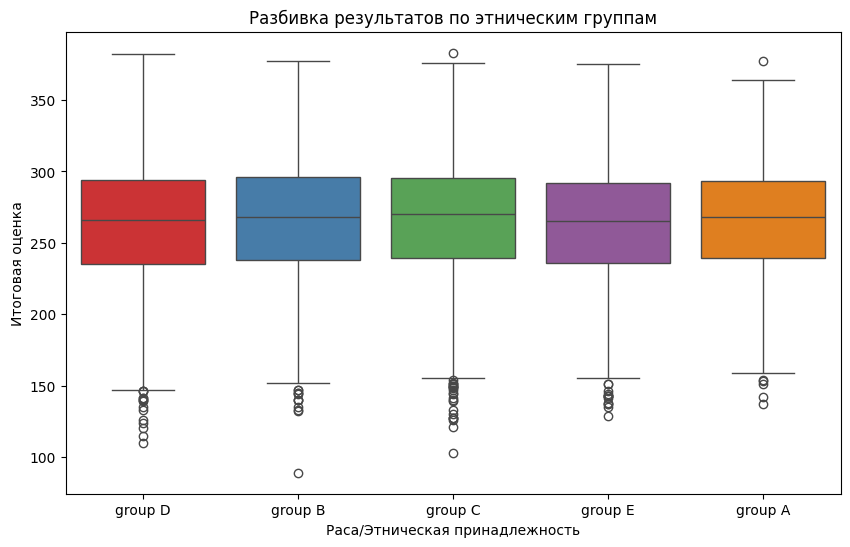

In [68]:
# Строим график распределения итоговой оценки в зависимости от расы/этнической принадлежности

plt.figure(figsize=(10, 6))
sns.boxplot(data=data_cleaned_race, x='race_ethnicity', y='total_score', palette='Set1')
plt.title("Разбивка результатов по этническим группам")
plt.xlabel("Раса/Этническая принадлежность")
plt.ylabel("Итоговая оценка")
plt.show()

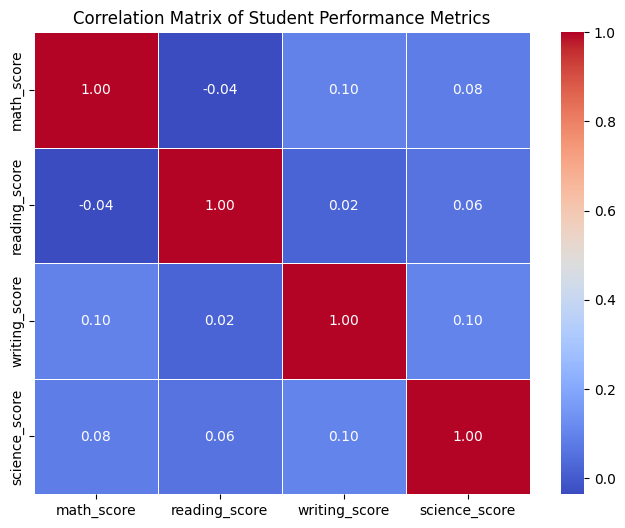

In [94]:
numerical_columns = ['math_score', 'reading_score', 'writing_score', 'science_score']

# Фильтрация данных: исключение строк с некорректными значениями
filtered_data = data_cleaned[~data_cleaned['math_score'].isin(['Unknown', '\\t41'])]

# Вычисление корреляционной матрицы
correlation_matrix = filtered_data[numerical_columns].corr()

# Визуализация корреляционной матрицы
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Student Performance Metrics')
plt.show()

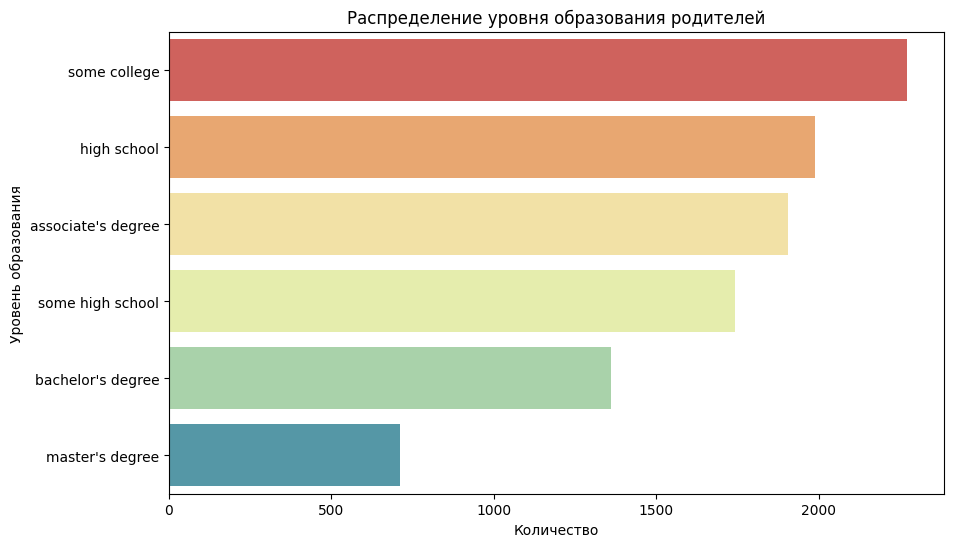

In [70]:
# Строим график распределения уровня образования родителей

plt.figure(figsize=(10, 6))
sns.countplot(data=data_cleaned, y='parental_level_of_education', palette='Spectral', order=df['parental_level_of_education'].value_counts().index)
plt.title("Распределение уровня образования родителей")
plt.xlabel("Количество")
plt.ylabel("Уровень образования")
plt.show()

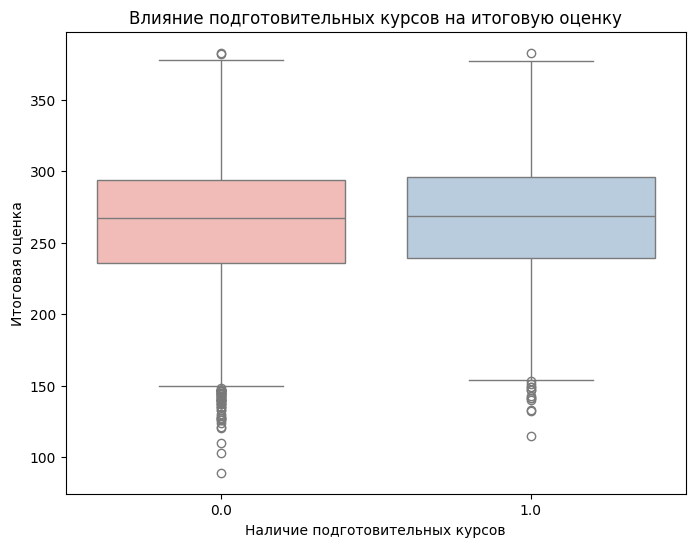

In [71]:
# Строим график влияния подготовительных курсов на итоговую оценку

plt.figure(figsize=(8, 6))
sns.boxplot(data=data_cleaned, x='test_preparation_course', y='total_score', palette='Pastel1')
plt.title("Влияние подготовительных курсов на итоговую оценку")
plt.xlabel("Наличие подготовительных курсов")
plt.ylabel("Итоговая оценка")
plt.show()

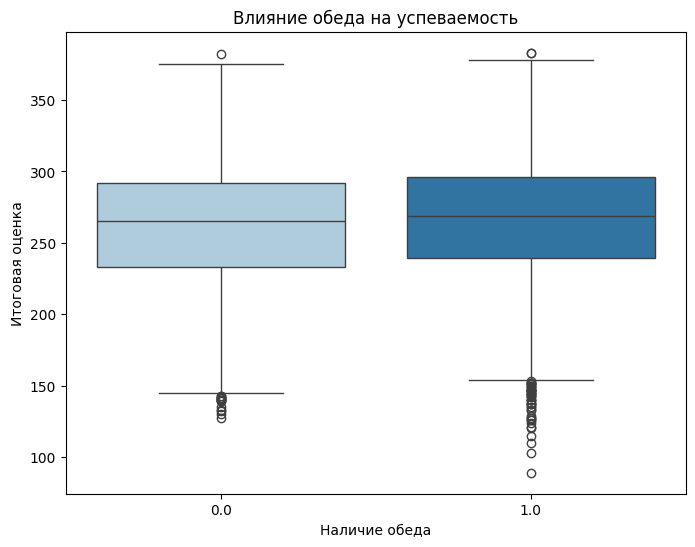

In [72]:
# Строим график влияния обеда на успеваемость студентов

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='lunch', y='total_score', palette='Paired')
plt.title("Влияние обеда на успеваемость")
plt.xlabel("Наличие обеда")
plt.ylabel("Итоговая оценка")
plt.show()

In [73]:
# Просматриваем столбец math_score на предмет наличия аномалий

print(df['math_score'].describe())
print(df['math_score'].unique())
print(df['math_score'].dtypes)

count     9976
unique      99
top         27
freq       233
Name: math_score, dtype: object
['89' '65' '10' '22' '26' '40' '34' '25' '28' '71' '55' nan '29' '18' '72'
 '23' '35' '38' '41' '44' '39' '85' '30' '100' '61' '47' '37' '49' '11'
 '32' '78' '36' '68' '97' '64' '60' '69' '87' '83' '42' '52' '27' '46'
 '12' '51' '75' '20' '81' '98' '24' '82' '19' '48' '74' '43' '62' '21'
 '93' '66' '0' '13' '45' '57' '54' '70' '50' '73' '88' '33' '76' '17' '16'
 '56' '80' '53' '14' '84' '58' '9' '8' '79' '77' '99' '67' '59' '63' '86'
 '31' '92' '94' '6' '91' '96' '95' '15' '90' '7' '4' '\\t41' '5']
object


In [74]:
# Приводим значения в столбце math_score к числовому виду

df['math_score'] = pd.to_numeric(df['math_score'], errors='coerce')

In [75]:
# Заполняем пропуски в столбце math_score медианными значениями

df['math_score'].fillna(df['math_score'].median(), inplace=True)

In [76]:
#  Отбираем только те строки, где оценка находится в диапазоне от 0 до 100

df = df[(df['math_score'] >= 0) & (df['math_score'] <= 100)]

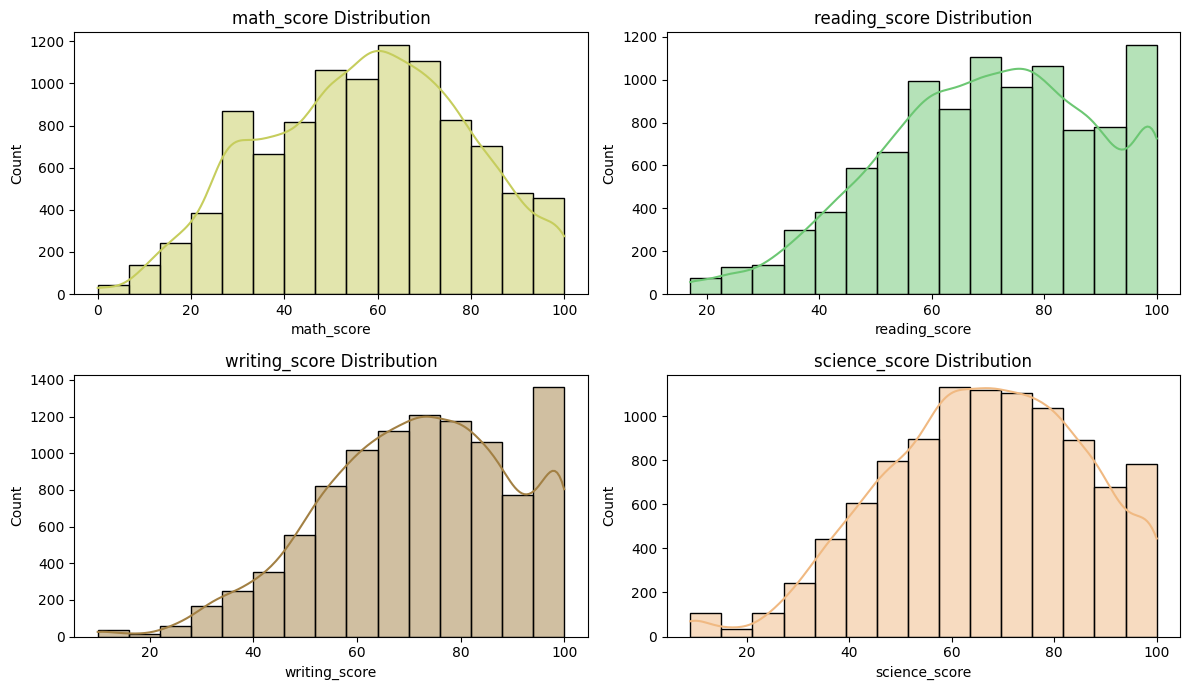

In [77]:
# Строим графики распределения по разным дисциплинам

subjects = ['math_score', 'reading_score', 'writing_score', 'science_score']
plt.figure(figsize=(12, 7))
for i, subject in enumerate(subjects, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[subject], kde=True, bins=15, color=np.random.rand(3,))
    plt.title(f"{subject} Distribution")
plt.tight_layout()
plt.show()